In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

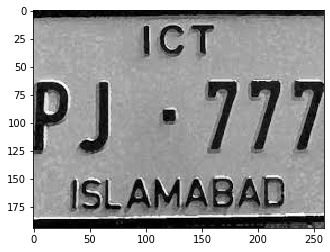

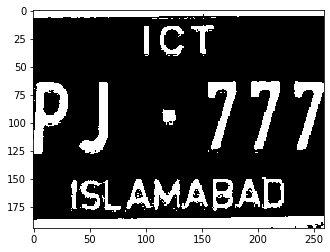

In [12]:
img=cv2.imread("plate2.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")
plt.show()
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#binary
plt.imshow(thresh,cmap="gray")
plt.show()
# kernel = np.ones((3,3),np.uint8)#opening
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
# plt.imshow(opening)
# plt.show()


In [3]:
import tensorflow as tf

In [4]:
model=tf.keras.models.load_model('weights-improvement-01-0.93.hdf5')



In [5]:
alphabet = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,
            'A':10,'B':11,'C':12,'D':13,
            'E':14,'F':15,'G':16,'H':17
            ,'I':18,'J':19,'K':20,'L':21,
            'M':22,'N':23,'O':24,'P':25,
            'Q':26,'R':27,'S':28,'T':29,
            'U':30,'V':31,'W':32,
            'X':33,'Y':34,'Z':35}

def num_to_char(num):
    for key in alphabet:
        if alphabet[key] == num:
            return key

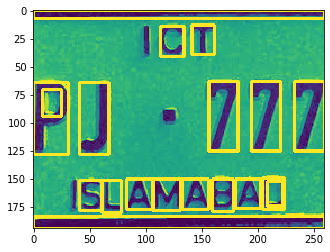

In [19]:
cnts,heir = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
zero=np.zeros((img.shape[0],img.shape[1],3))
x=img.shape[0]
y=img.shape[1]
area_orig=x*y

med = np.median(np.unique(sorted([cv2.contourArea(x) for x in cnts if cv2.contourArea(x) > 0]))) /area_orig
# print(mean)
sort_dict={}
zero=np.zeros((x,y))
for c in cnts:
    (x, y, W, H) = cv2.boundingRect(c)
    area=W*H
    if(area/area_orig>med):
        cv2.rectangle(img,(x,y),(x+W,y+H),(255,0,0),2)
        roi = (thresh[y:y+H, x:x+W])/1.0
        
        #roi = cv2.blur(roi,(5,5))
        roi=cv2.bitwise_not(roi)
        
        if(W>H):
            z=np.zeros((W,W))
            z[0:H,0:W]=roi
        
        else:
            z=np.zeros((H,H))
            z[0:H,0:W]=roi
    
          
        roi=cv2.resize(z,(64,64))
        sort_dict[(x,y)]=roi
#         plt.imshow(roi)
#         plt.show()
#         roi=tf.expand_dims(tf.expand_dims(roi,0),-1)
#         r=model.predict_classes(roi)
# #         print(r)
#         print(num_to_char(r))

plt.imshow(img)

In [20]:
sort_dict=[sort_dict[x] for x in sorted(sort_dict)]
    

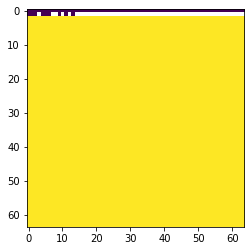

Q


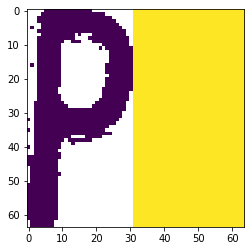

Q


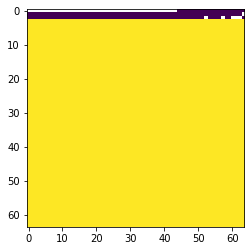

Q


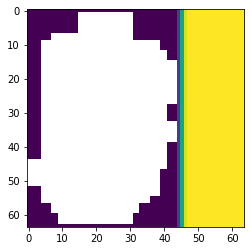

A


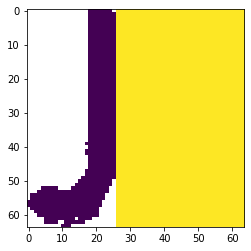

Q


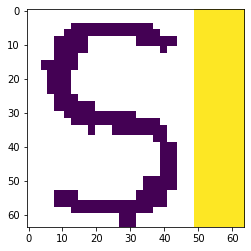

W


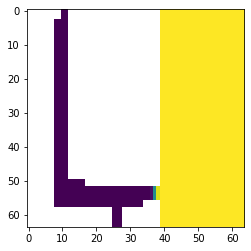

N


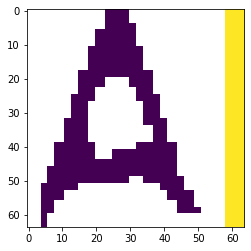

S


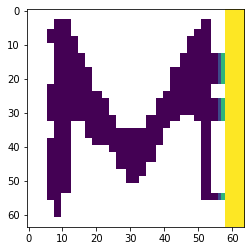

W


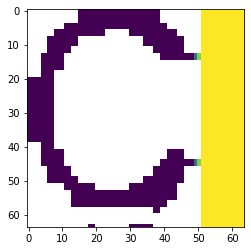

J


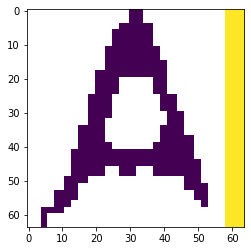

Q


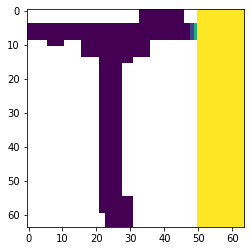

A


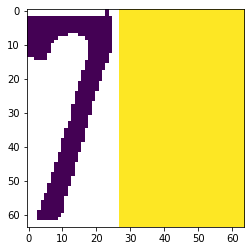

Q


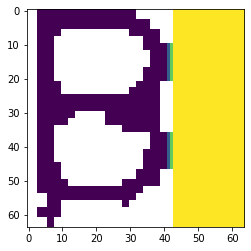

Q


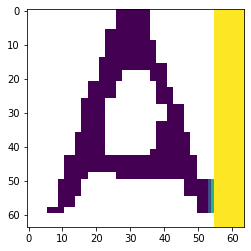

S


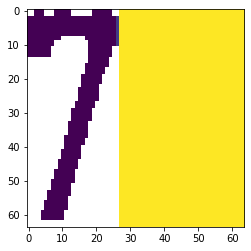

Q


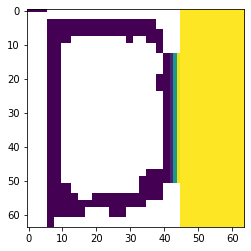

N


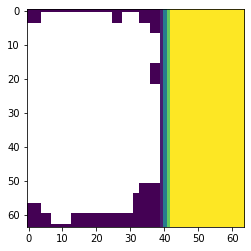

A


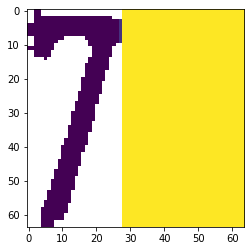

Q


In [21]:
for roi in sort_dict:
    plt.imshow(roi)
    plt.show()
    roi=tf.expand_dims(tf.expand_dims(roi,0),-1)
    r=model.predict_classes(roi)
    

    print(num_to_char(r))